In [27]:
#Fashion-MNIST是一个10类服饰分类数据集，之后章节里将使用它来检验不同算法的表现。
#我们将高和宽分别为hh和ww像素的图像的形状记为h×wh×w或(h，w)。

#torchvision包，它是服务于PyTorch深度学习框架的，主要用来构建计算机视觉模型。torchvision主要由以下几部分构成：

#1.torchvision.datasets: 一些加载数据的函数及常用的数据集接口；
#2.torchvision.models: 包含常用的模型结构（含预训练模型），例如AlexNet、VGG、ResNet等；
#3.torchvision.transforms: 常用的图片变换，例如裁剪、旋转等；
#4.torchvision.utils: 其他的一些有用的方法。



%run d2lzh_pytorch.ipynb 

import torch
import torchvision  #torchvision.datasets: 一些加载数据的函数及常用的数据集接口
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

#导入d2l。py文件
import sys
sys.path.append('/home/cxking/桌面/code/d2lzh_pytorch')
import utils as d2l

#定义训练测试集的来源
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

print(type(mnist_train))
print(len(mnist_train), len(mnist_test))


[NbConvertApp] WARNING | pattern 'file_name.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout 

In [37]:
#通过下标来访问任意一个样本:
feature, label = mnist_train[0]
print(feature.shape, label)  # Channel x Height x Width


torch.Size([1, 28, 28]) 9


In [30]:
# 将数值标签转成相应的文本标签（labels）。
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


In [31]:
#在一行里画出多张图像和对应标签的函数。
# 本函数已保存在d2lzh包中方便以后使用

def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()


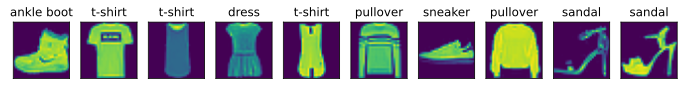

In [32]:
#看一下训练数据集中前10个样本的图像内容和文本标签。

X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))


In [33]:
#PyTorch的DataLoader中一个很方便的功能是允许使用多进程来加速数据读取。
#这里我们通过参数num_workers来设置4个进程读取数据。

batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)


In [34]:
#最后我们查看读取一遍训练数据需要的时间。

start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))


1.23 sec
